In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
from palaeoPSM.psm_read import FragPipeRun
from palaeoPSM.psm_to_long import psm_to_long
from Bio import SeqIO
import plotly.express as px

In [2]:
db1 = '../databases/DB1_bovin_ArchaeocRAP3.2.fasta'
record_dict = SeqIO.to_dict(SeqIO.parse(db1, "fasta"))

contams = '../databases/contams.fasta'
contams_dict = SeqIO.to_dict(SeqIO.parse(contams, "fasta"))
contams_dict

lacb = [
    'sp|P02754A|LACB_BOVIN',
    'sp|P02754B|LACB_BOVIN',
    'sp|P02754C|LACB_BOVIN',
    'sp|P02754D|LACB_BOVIN'
]

In [22]:
contams_dict

{'sp|O00762|UBE2C_HUMAN': SeqRecord(seq=Seq('MASQNRDPAATSVAAARKGAEPSGGAARGPVGKRLQQELMTLMMSGDKGISAFP...QEP'), id='sp|O00762|UBE2C_HUMAN', name='sp|O00762|UBE2C_HUMAN', description='sp|O00762|UBE2C_HUMAN Ubiquitin-conjugating enzyme E2 C OS=Homo sapiens OX=9606 GN=UBE2C PE=1 SV=1', dbxrefs=[]),
 'sp|O43790|KRT86_HUMAN': SeqRecord(seq=Seq('MTCGSYCGGRAFSCISACGPRPGRCCITAAPYRGISCYRGLTGGFGSHSVCGGF...KRC'), id='sp|O43790|KRT86_HUMAN', name='sp|O43790|KRT86_HUMAN', description='sp|O43790|KRT86_HUMAN Keratin, type II cuticular Hb6 OS=Homo sapiens OX=9606 GN=KRT86 PE=1 SV=1', dbxrefs=[]),
 'sp|O76009|KT33A_HUMAN': SeqRecord(seq=Seq('MSYSCGLPSLSCRTSCSSRPCVPPSCHGCTLPGACNIPANVSNCNWFCEGSFNG...FGY'), id='sp|O76009|KT33A_HUMAN', name='sp|O76009|KT33A_HUMAN', description='sp|O76009|KT33A_HUMAN Keratin, type I cuticular Ha3-I OS=Homo sapiens OX=9606 GN=KRT33A PE=2 SV=2', dbxrefs=[]),
 'sp|O76011|KRT34_HUMAN': SeqRecord(seq=Seq('MLYAKPPPTINGIKGLQRKERLKPAHIHLQQLTCFSITCSSTMSYSCCLPSLGC...CCN'), id='sp|O76011

In [3]:
milk_st = FragPipeRun(
    path='../fp_results/milk_st_db1_test',
    db=record_dict,
    run_id='milk_st_db1',
    contams=contams_dict,
    format='pepXML',
    decoy_tag='rev_',
    n_scans_path='../mzml_data_milk/n_scans.csv'
)

Reading # of scans from ../mzml_data_milk/n_scans.csv


In [4]:
exp_design = pd.read_csv('../briquettes_exp_design.csv')
exp_design = exp_design.merge(milk_st.n_scans, on='sample')

In [5]:
exp_design = exp_design.sort_values(['cooking', 'sample' ,'firing'])

/tmp/ipykernel_183997/4000036423.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p1.axes[0,0].set_xticklabels(p1.axes[0,0].get_xticklabels(), rotation=40, ha='right', rotation_mode="anchor")
/tmp/ipykernel_183997/4000036423.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p1.axes[0,1].set_xticklabels(p1.axes[0,1].get_xticklabels(), rotation=40, ha='right', rotation_mode="anchor")


[Text(0, 0, 'milk_1A'),
 Text(1, 0, 'milk_1B'),
 Text(2, 0, 'milk_2A'),
 Text(3, 0, 'milk_2B'),
 Text(4, 0, 'milk_3A'),
 Text(5, 0, 'milk_3B'),
 Text(6, 0, 'milk_5A'),
 Text(7, 0, 'milk_6A'),
 Text(8, 0, 'milk_7A'),
 Text(9, 0, 'milk_8A'),
 Text(10, 0, 'milk_8B')]

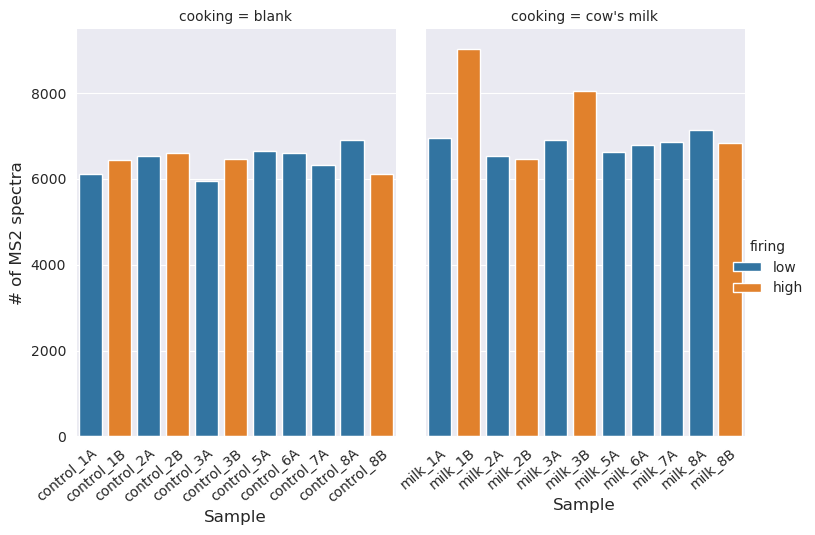

In [6]:
p1 = sns.catplot(exp_design, x='sample', y='n_ms2scans', col='cooking', hue='firing', kind='bar', sharex=False)
p1.set_xlabels("Sample", size=12)
p1.set_ylabels("# of MS2 spectra", size=12)
p1.fig.set_figwidth(8,10)

p1.axes[0,0].set_xticklabels(p1.axes[0,0].get_xticklabels(), rotation=40, ha='right', rotation_mode="anchor")
p1.axes[0,1].set_xticklabels(p1.axes[0,1].get_xticklabels(), rotation=40, ha='right', rotation_mode="anchor")


In [7]:
psm_data = milk_st.read(n_procs=1, save_path=None, remove_contams=True, remove_decoy=True)


	Reading sample milk_1B ... Done
	Reading sample milk_1A ... Done
	Reading sample milk_2B ... Done
	Reading sample milk_2A ... Done


In [8]:
psm_data

,Scan_No,RTsec,Seq,calc_mass,delta_mass,score,probability,prot_id,start,other_prot_ids,var_mods_pos,delta_mass_mods_pos,is_decoy,Run_id,Sample,q
1159,2517,404.52063,TPEVDDEALEK,1244.57710,0.000000,30.448,1.0000,sp|P02754A|LACB_BOVIN,140,"[sp|P02754B|LACB_BOVIN, sp|P02754C|LACB_BOVIN,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",False,milk_st_db1,milk_1B,0.000000
1233,2656,418.11703,TPEVDDEALEK,1244.57710,0.000000,34.577,1.0000,sp|P02754A|LACB_BOVIN,140,"[sp|P02754B|LACB_BOVIN, sp|P02754C|LACB_BOVIN,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",False,milk_st_db1,milk_1B,0.000000
1253,2694,421.98390,TPEVDDEALEK,1244.57710,0.000000,34.830,1.0000,sp|P02754A|LACB_BOVIN,140,"[sp|P02754B|LACB_BOVIN, sp|P02754C|LACB_BOVIN,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",False,milk_st_db1,milk_1B,0.000000
1265,2715,423.79877,ALKALPMHIR,1164.68000,58.006470,23.249,1.0000,sp|P02754A|LACB_BOVIN,154,"[sp|P02754B|LACB_BOVIN, sp|P02754C|LACB_BOVIN,...","[0, 0, 0, 0, 0, 0, 15.995, 0, 0, 0]","[0.0, 0.0, 58.00647, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,milk_st_db1,milk_1B,0.000000
1271,2734,426.05524,TPEVDDEALEK,1244.57708,101.047850,34.293,1.0000,sp|P02754A|LACB_BOVIN,140,"[sp|P02754B|LACB_BOVIN, sp|P02754C|LACB_BOVIN,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",False,milk_st_db1,milk_1B,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,6798,1089.43690,LSFNPTQLEEQCHI,1714.79850,-57.020264,14.384,0.9870,sp|P02754A|LACB_BOVIN,164,"[sp|P02754B|LACB_BOVIN, sp|P02754C|LACB_BOVIN,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 57.021, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,milk_st_db1,milk_2A,0.001607
2324,6670,1071.41770,YVEELKPTPEGDLEILLQK,2213.18290,423.178960,14.549,0.9537,sp|P02754A|LACB_BOVIN,57,[sp|P02754B|LACB_BOVIN],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 423.17896, 423.17896, 0.0...",False,milk_st_db1,milk_2A,0.001607
2191,6264,1014.68317,KADAVTLDGGMVF,1338.64880,59.145874,7.264,0.9303,sp|P24627|TRFL_BOVIN,71,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15.995, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 59.14...",False,milk_st_db1,milk_2A,0.002388
1541,4160,730.85510,KSCHTGLGRSAGWIIPMGIL,2169.11870,25.947510,9.584,0.1411,sp|P24627|TRFL_BOVIN,131,[],"[0, 0, 57.021, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0.0, 25.94751, 25.94751, 25.94751, 25.94751, ...",False,milk_st_db1,milk_2A,0.011372


In [9]:
# Rejoin LACB variants
psm_data.loc[psm_data['prot_id'].isin(lacb), 'prot_id'] = 'sp|P02754|LACB_BOVIN'

In [14]:
def get_weights(m):
    w = m > 0.5
    tot = np.sum(w)
    if tot == 0:
        return np.zeros(m.shape[0])
    else:
        return w / tot
def get_psm_delta_mass(m):
    m = m[m>0.5]
    if len(m) == 0:
        return 0
    else:
        return m[0]

psm_data['delta_mass_mods_weights'] = psm_data['delta_mass_mods_pos'].apply(get_weights)
psm_data['delta_mass'] = psm_data['delta_mass_mods_pos'].apply(get_psm_delta_mass)


In [15]:
psm_data

,Scan_No,RTsec,Seq,calc_mass,delta_mass,score,probability,prot_id,start,other_prot_ids,var_mods_pos,delta_mass_mods_pos,is_decoy,Run_id,Sample,q,delta_mass_mods_weights,pep_positions,pep_letters,gt_005fdr
1159,2517,404.52063,TPEVDDEALEK,1244.57710,0.000000,30.448,1.0000,sp|P02754|LACB_BOVIN,140,"[sp|P02754B|LACB_BOVIN, sp|P02754C|LACB_BOVIN,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",False,milk_st_db1,milk_1B,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[141, 142, 143, 144, 145, 146, 147, 148, 149, ...","[T, P, E, V, D, D, E, A, L, E, K]",False
1233,2656,418.11703,TPEVDDEALEK,1244.57710,0.000000,34.577,1.0000,sp|P02754|LACB_BOVIN,140,"[sp|P02754B|LACB_BOVIN, sp|P02754C|LACB_BOVIN,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",False,milk_st_db1,milk_1B,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[141, 142, 143, 144, 145, 146, 147, 148, 149, ...","[T, P, E, V, D, D, E, A, L, E, K]",False
1253,2694,421.98390,TPEVDDEALEK,1244.57710,0.000000,34.830,1.0000,sp|P02754|LACB_BOVIN,140,"[sp|P02754B|LACB_BOVIN, sp|P02754C|LACB_BOVIN,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",False,milk_st_db1,milk_1B,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[141, 142, 143, 144, 145, 146, 147, 148, 149, ...","[T, P, E, V, D, D, E, A, L, E, K]",False
1265,2715,423.79877,ALKALPMHIR,1164.68000,58.006470,23.249,1.0000,sp|P02754|LACB_BOVIN,154,"[sp|P02754B|LACB_BOVIN, sp|P02754C|LACB_BOVIN,...","[0, 0, 0, 0, 0, 0, 15.995, 0, 0, 0]","[0.0, 0.0, 58.00647, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,milk_st_db1,milk_1B,0.000000,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[155, 156, 157, 158, 159, 160, 161, 162, 163, ...","[A, L, K, A, L, P, M, H, I, R]",False
1271,2734,426.05524,TPEVDDEALEK,1244.57708,0.000000,34.293,1.0000,sp|P02754|LACB_BOVIN,140,"[sp|P02754B|LACB_BOVIN, sp|P02754C|LACB_BOVIN,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",False,milk_st_db1,milk_1B,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[141, 142, 143, 144, 145, 146, 147, 148, 149, ...","[T, P, E, V, D, D, E, A, L, E, K]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,6798,1089.43690,LSFNPTQLEEQCHI,1714.79850,0.000000,14.384,0.9870,sp|P02754|LACB_BOVIN,164,"[sp|P02754B|LACB_BOVIN, sp|P02754C|LACB_BOVIN,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 57.021, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,milk_st_db1,milk_2A,0.001607,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[165, 166, 167, 168, 169, 170, 171, 172, 173, ...","[L, S, F, N, P, T, Q, L, E, E, Q, C, H, I]",False
2324,6670,1071.41770,YVEELKPTPEGDLEILLQK,2213.18290,423.178960,14.549,0.9537,sp|P02754|LACB_BOVIN,57,[sp|P02754B|LACB_BOVIN],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 423.17896, 423.17896, 0.0...",False,milk_st_db1,milk_2A,0.001607,"[0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, ...","[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 6...","[Y, V, E, E, L, K, P, T, P, E, G, D, L, E, I, ...",False
2191,6264,1014.68317,KADAVTLDGGMVF,1338.64880,59.145874,7.264,0.9303,sp|P24627|TRFL_BOVIN,71,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15.995, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 59.14...",False,milk_st_db1,milk_2A,0.002388,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.333...","[72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 8...","[K, A, D, A, V, T, L, D, G, G, M, V, F]",False
1541,4160,730.85510,KSCHTGLGRSAGWIIPMGIL,2169.11870,25.947510,9.584,0.1411,sp|P24627|TRFL_BOVIN,131,[],"[0, 0, 57.021, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0.0, 25.94751, 25.94751, 25.94751, 25.94751, ...",False,milk_st_db1,milk_2A,0.011372,"[0.0, 0.08333333333333333, 0.08333333333333333...","[132, 133, 134, 135, 136, 137, 138, 139, 140, ...","[K, S, C, H, T, G, L, G, R, S, A, G, W, I, I, ...",False


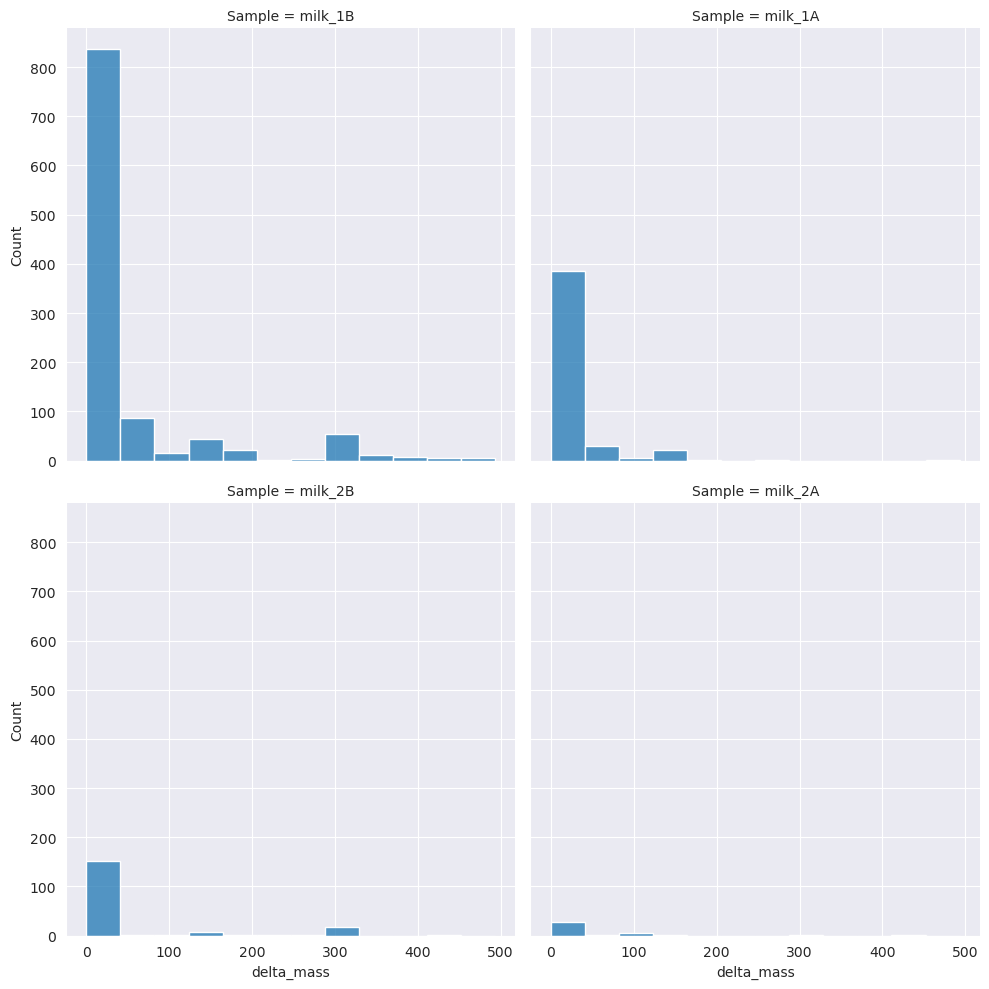

In [11]:
p2 = sns.displot(psm_data, x='delta_mass', col='Sample', col_wrap=2)
p2.fig.set_figwidth(10, 8)

In [16]:
psm_long = psm_to_long(psm_data)

In [17]:
psm_long

,Run_id,Sample,prot_id,gt_005fdr,pep_positions,pep_letters,count,total_counts,rel_count
0,milk_st_db1,milk_1A,sp|P02754|LACB_BOVIN,False,16,A,16,16,1.0
1,milk_st_db1,milk_1A,sp|P02754|LACB_BOVIN,False,17,L,120,120,1.0
2,milk_st_db1,milk_1A,sp|P02754|LACB_BOVIN,False,18,I,120,120,1.0
3,milk_st_db1,milk_1A,sp|P02754|LACB_BOVIN,False,19,V,120,120,1.0
4,milk_st_db1,milk_1A,sp|P02754|LACB_BOVIN,False,20,T,120,120,1.0
...,...,...,...,...,...,...,...,...,...
998,milk_st_db1,milk_2B,sp|P24627|TRFL_BOVIN,False,448,P,1,1,1.0
999,milk_st_db1,milk_2B,sp|P24627|TRFL_BOVIN,False,449,T,1,1,1.0
1000,milk_st_db1,milk_2B,sp|P24627|TRFL_BOVIN,False,450,E,1,1,1.0
1001,milk_st_db1,milk_2B,sp|P24627|TRFL_BOVIN,False,451,G,1,1,1.0


In [28]:
fig = px.bar(
    psm_long.query('prot_id == "sp|P02754|LACB_BOVIN"'),
    x="pep_positions", y="count", color="pep_letters", title="Long-Form Input",
    facet_row='Sample', width=1500, height=800
)
fig.show()